In [214]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from time import time

In [215]:
class oi_2d(object):
    #---xo,yo: observation points
    #---xg,yg: grid points
    #---R: raidus
    #---B_std: back ground standard deviation
    #---fo: observation value at observation points
    #---o_std: observation standard deviation
    def __init__(self,xo,xg,yo,yg,R,B_std):
        self.xo = xo
        self.xg = xg
        self.yo = yo
        self.yg = yg
        self.R = R
        self.B_std = B_std
        # Construct background error covariance matricies
        self.Bi = np.exp(-((self.xg[:,np.newaxis]-self.xo[np.newaxis,:])**2\
                         +(yg[:,np.newaxis]-yo[np.newaxis,:])**2)/self.R**2)*self.B_std**2
        self.B = np.exp(-((self.xo[:,np.newaxis]-self.xo[np.newaxis,:])**2\
                         +(yo[:,np.newaxis]-yo[np.newaxis,:])**2)/self.R**2)*self.B_std**2
    
    
    def interpolate(self,fo,o_std):
        self.fo = fo
        self.o_std = o_std
        self.N = fo.shape
        self.Ng = self.xg.shape
        #  Construct observational error covariance matrix (diagonal)
        self.O = self.o_std**2*np.eye(self.N[0])
        #  Weights, analysis and analysis error
        self.W = np.dot(self.Bi, np.linalg.inv(self.O + self.B))
        fA = np.dot(self.W,fo)
        EA = self.B_std**2-np.diag(np.dot(self.W, self.Bi.T)) 
        return fA, EA

In [216]:
obs_std = 1
back_std = np.sqrt(1) 
back_radius = 0.2

In [231]:
#---Observation points and data
x,y,z = np.load('truth_A.npy')
xo = x
yo = y
N_obs = len(x)
f_obs = z

In [218]:
#---Grid points
y_grid,x_grid = np.mgrid[0:1:100j,0:1:100j]
yg = y_grid.flatten()
xg = x_grid.flatten()

In [219]:
#---Optimal interpolation
t_start = time()
twoD = oi_2d(xo, xg,yo,yg, back_radius, back_std)
A,EA = twoD.interpolate(f_obs,obs_std)
print('Calculated in %7.3f seconds' % (time()-t_start))

Calculated in   2.099 seconds


0.149807418826


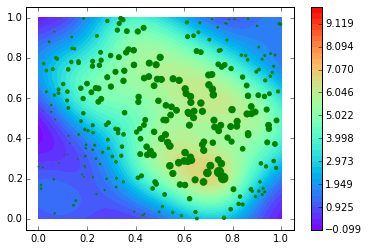

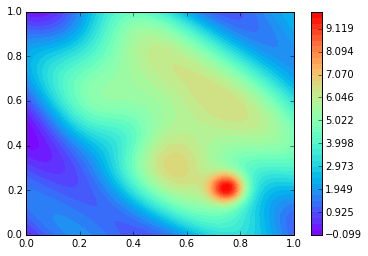

In [220]:
#---plot truth field and analysis field 
import truth
ta = truth.TruthA(x_grid,y_grid)
ta.z.shape
#---plot fA
A = np.reshape(A,(100,100))
fig = plt.figure()
level = np.linspace(ta.z.min(),ta.z.max(),40)
plt.contourf(x_grid,y_grid,A,cmap='rainbow',levels=level)
plt.colorbar()
plt.scatter(x,y,z**2,color='g')
#---plot truth
fig = plt.figure()
level = np.linspace(ta.z.min(),ta.z.max(),40)
plt.contourf(x_grid,y_grid,ta.z,cmap='rainbow',levels=level)
plt.colorbar()

print (np.sum((A-ta.z)**2)/x_grid.size)

/Users/xunwang/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:764: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


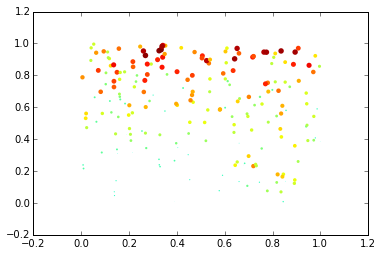

In [244]:
obs_std = 1
back_std = np.sqrt(1) 
back_radius = 0.5
#---Observation points and data
x,y,z = np.load('truth_B.npy')
plt.scatter(x,y,z*10,z,edgecolor='none')
xo = x
yo = y
N_obs = len(x)
f_obs = z

In [245]:
#---Optimal interpolation
t_start = time()
twoD = oi_2d(xo, xg,yo,yg, back_radius, back_std)
A,EA = twoD.interpolate(f_obs,obs_std)
print('Calculated in %7.3f seconds' % (time()-t_start))

Calculated in   2.028 seconds


0.553183339982


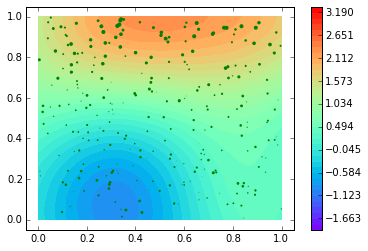

In [246]:
#---plot truth field and analysis field 
import truth
tb = truth.TruthB(x_grid,y_grid)
tb.z.shape
#---get fA
A = np.reshape(A,(100,100))
fig = plt.figure()
level = np.linspace(tb.z.min(),tb.z.max(),40)
plt.contourf(x_grid,y_grid,A,cmap='rainbow',levels=level)
plt.colorbar()
plt.scatter(x,y,z**2,color='g')
print (np.sum((A-tb.z)**2)/x_grid.size)